In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from data_loader import load_images_and_labels

# Preprocessing and Feature Engineering Data

In [3]:
directory = "caltech-101/101_ObjectCategories"
img_height = 128
img_width = 128

images, labels, class_names = load_images_and_labels(directory, img_height, img_width)

In [4]:
images = images / 255.0 # normalize image color values from 0-255 to 0-1
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=123)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Class Names: ['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ba

In [5]:
images[0]

array([[[0.34901962, 0.3372549 , 0.31764707],
        [0.37254903, 0.36078432, 0.34117648],
        [0.3529412 , 0.34117648, 0.32156864],
        ...,
        [0.5058824 , 0.5764706 , 0.49019608],
        [0.49803922, 0.5529412 , 0.4627451 ],
        [0.47843137, 0.5254902 , 0.44705883]],

       [[0.3372549 , 0.3254902 , 0.30588236],
        [0.34509805, 0.33333334, 0.3137255 ],
        [0.34901962, 0.3372549 , 0.31764707],
        ...,
        [0.4862745 , 0.5529412 , 0.47843137],
        [0.4745098 , 0.53333336, 0.4509804 ],
        [0.46666667, 0.5176471 , 0.44705883]],

       [[0.3372549 , 0.3254902 , 0.30588236],
        [0.34509805, 0.33333334, 0.3137255 ],
        [0.36078432, 0.34901962, 0.32941177],
        ...,
        [0.44313726, 0.50980395, 0.44705883],
        [0.43529412, 0.49411765, 0.41960785],
        [0.42745098, 0.47843137, 0.4117647 ]],

       ...,

       [[0.14117648, 0.13333334, 0.07450981],
        [0.1254902 , 0.11764706, 0.05882353],
        [0.12941177, 0

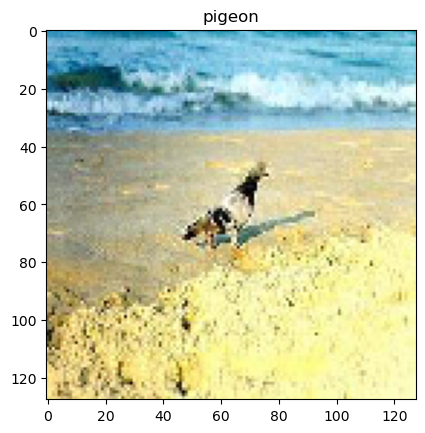

In [31]:
# show a random image
index = random.randint(0, len(x_train))
plt.imshow(x_train[index])
plt.title(class_names[y_train[index]])
plt.show()

# ViT Model

In [ ]:
from tf.keras.applications import mlp_mixer


# Load the pre-trained ViT model from TensorFlow Hub
vit_model_url = "https://tfhub.dev/google/vit_base_patch16_224/1"
vit_layer = hub.KerasLayer(vit_model_url, trainable=True)

# Build the model
model = tf.keras.Sequential([
    vit_layer,
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()